In [1]:
#installing important libraries for processing
!pip install gtfs-kit
!pip install gtfs_functions 
!pip install datashader
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 739 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 21.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.0 MB 64.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10.1 MB 51.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16.6 MB 157 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7.8 MB 53.9 MB/s 
  Created wheel for json2html: filename=json

In [2]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: ignored

In [ ]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import geopy.distance
import gtfs_functions as gtfs
import pandas as pd
#DATASHADER
import datashader as ds
from datashader import transfer_functions as tr_fns
#from datashader.bokeh_ext import InteractiveImage
from functools import partial
#from datashader.bokeh_ext import InteractiveImage
import colorcet as cc
import datashader.transfer_functions as tf

In [ ]:
#unpacking the zip file with the gtfs library to DataFrames
routes, stops, stop_times, trips, shapes = gtfs.import_gtfs("/content/drive/MyDrive/gtfs.zip")

Google has a reference file that contains all the information about GTFS files: https://developers.google.com/transit/gtfs/reference
- Routes - This contains information about the whole routes (it's ID, short name that is displayed on the vehicles, and description which in this case contains the first and last stop of the route)
- Stops - Contains information about the stops in the route (It's ID, Name, and location with coordinates (With GPS coordinates that will be useful later))
- Stop_times - Is one of the most useful DataFrames. Information about the stops and the times of arrival and departure (Which can later be used to filter out needed ones)
- Trips - Almost the same as the routes DF but it contains the GPS coordinates of the whole Line (Which will later be useful for finding the lines with 1 transfer)
- Shapes - Shapes contain the Coordinates of all the routes

## Displaying the Dataframes

In [ ]:
display("Routes: ",routes,"Stops: ", stops,
        "Stop Times: ", stop_times, 
        "Trips: ", trips,"Shapes: ", shapes)

'Routes: '

agency_id route_id route_short_name route_long_name  route_type  \
0         BKK     0050                5             NaN           3   
1         BKK     0070                7             NaN           3   
2         BKK     0075               7E             NaN           3   
3         BKK     0078               7G             NaN           3   
4         BKK     0085               8E             NaN           3   
..        ...      ...              ...             ...         ...   
345       HEV       H9               H9             NaN         109   
346       BKK     MP53               M3             NaN           3   
347       BKK    MP531              M3A             NaN           3   
348       BKK    MP533               M3             NaN           3   
349       BKK    MP536              M30             NaN           3   

                                            route_desc route_color  \
0             Pasar√©ti t√©r / R√°kospalota, Kossuth utca      009EE3   
1    Albertfalva vas√∫t√°llom√°s / √öjpalota, Ny√≠rpalot...      009EE3   
2          Blaha Lujza t√©r M / √öjpalota, Ny√≠rpalota √∫t      009EE3   
3    Cinkotai aut√≥buszgar√°zs / √öjpalota, Ny√≠rpalota √∫t      009EE3   
4    Kelenf√∂ld vas√∫t√°llom√°s M / √öjpalota, Ny√≠rpalot...      009EE3   
..                                                 ...         ...   
345                            √ñrs vez√©r tere / Cs√∂m√∂r      ED6E86   
346          G√∂ncz √Årp√°d v√°rosk√∂zpont M / K√°lvin t√©r M      009EE3   
347  G√∂ncz √Årp√°d v√°rosk√∂zpont M / Nyugati p√°lyaudvar M      009EE3   
348     G√∂ncz √Årp√°d v√°rosk√∂zpont M / K≈ëb√°nya-Kispest M      009EE3   
349                       Nagyv√°rad t√©r M / N√©pliget M      4CA22F   

    route_text_color route_sort_order  
0             FFFFFF               23  
1             FFFFFF               25  
2             FFFFFF               26  
3             FFFFFF               27  
4             FFFFFF               28  
..               ...              ...  
345           FFFFFF                9  
346           FFFFFF              322  
347           FFFFFF              323  
348           FFFFFF              321  
349           FFFFFF              324  

[350 rows x 9 columns]

'Stops: '

stop_id           stop_name stop_code  location_type location_sub_type  \
0     003209       Batthy√°ny t√©r     09001            NaN               NaN   
1     004903      √ñrs vez√©r tere     19795            NaN               NaN   
2     007736             G√∂d√∂ll≈ë     19870            NaN               NaN   
3     007817          M√°rta utca       NaN            NaN               NaN   
4     007877             B√≠r√≥s√°g       NaN            NaN               NaN   
...      ...                 ...       ...            ...               ...   
5383  F04834           Tetra Pak       NaN            NaN               NaN   
5384  F04835  Buda√∂rsi lak√≥telep       NaN            NaN               NaN   
5385  F04836  Buda√∂rsi lak√≥telep       NaN            NaN               NaN   
5386  F04837          Lejt≈ë utca       NaN            NaN               NaN   
5387  F04838          Lejt≈ë utca       NaN            NaN               NaN   

     parent_station  wheelchair_boarding stop_direction  \
0             09001                  NaN            NaN   
1             19795                  NaN            NaN   
2             19870                  NaN            NaN   
3               NaN                  2.0            160   
4               NaN                  1.0            -78   
...             ...                  ...            ...   
5383            NaN                  2.0            -49   
5384            NaN                  1.0             56   
5385            NaN                  1.0             72   
5386            NaN                  1.0            -81   
5387            NaN                  1.0             86   

                       geometry  
0     POINT (19.03932 47.50678)  
1     POINT (19.13719 47.50359)  
2     POINT (19.35779 47.59334)  
3     POINT (18.92950 47.42918)  
4     POINT (18.97806 47.51954)  
...                         ...  
5383  POINT (18.90352 47.45783)  
5384  POINT (18.94090 47.45569)  
5385  POINT (18.94063 47.45564)  
5386  POINT (18.93061 47.45961)  
5387  POINT (18.93158 47.45942)  

[5388 rows x 9 columns]

'Stop Times: '

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
0       C0418310  F04181       28980.0         28980.0              0   
1       C0418310  F04526       29160.0         29160.0              1   
2       C0418311  F04526       30600.0         30600.0              0   
3       C0418311  F04181       30780.0         30780.0              1   
4       C0418312  F04181       30780.0         30780.0              0   
...          ...     ...           ...             ...            ...   
810892  H8000_22  F04692       89280.0         89280.0             13   
810893  H8000_22  F04793       89400.0         89400.0             14   
810894  H8000_22  F04690       89520.0         89580.0             15   
810895  H8000_22  F04688       89820.0         89820.0             16   
810896  H8000_22  009273       90000.0         90000.0             17   

       stop_headsign  pickup_type drop_off_type  shape_dist_traveled route_id  \
0                NaN          NaN           NaN                  0.0     8140   
1                NaN          NaN           NaN                160.0     8140   
2                NaN          NaN           NaN                  0.0     8140   
3                NaN          NaN           NaN                160.0     8140   
4                NaN          NaN           NaN                  0.0     8140   
...              ...          ...           ...                  ...      ...   
810892           NaN          NaN           NaN              13673.0       H5   
810893           NaN          NaN           NaN              14507.0       H5   
810894           NaN          NaN           NaN              16297.0       H5   
810895           NaN          NaN           NaN              19497.0       H5   
810896           NaN          1.0           NaN              20706.0       H5   

        ... direction_id  shape_id                stop_name     stop_code  \
0       ...            0      Y701        Csepel-Kir√°lyerd≈ë           NaN   
1       ...            0      Y701  Soroks√°r, Moln√°r-sziget           NaN   
2       ...            1      Y702  Soroks√°r, Moln√°r-sziget           NaN   
3       ...            1      Y702        Csepel-Kir√°lyerd≈ë           NaN   
4       ...            0      Y701        Csepel-Kir√°lyerd≈ë           NaN   
...     ...          ...       ...                      ...           ...   
810892  ...            0        22      Budakal√°sz, Lenfon√≥  09191_F04692   
810893  ...            0        22         Szentistv√°ntelep  09209_F04793   
810894  ...            0        22                    Pom√°z  09134_F04690   
810895  ...            0        22            Pann√≥niatelep  09217_F04688   
810896  ...            0        22               Szentendre         09142   

       location_type  location_sub_type parent_station wheelchair_boarding  \
0                NaN                NaN            NaN                 2.0   
1                NaN                NaN            NaN                 2.0   
2                NaN                NaN            NaN                 2.0   
3                NaN                NaN            NaN                 2.0   
4                NaN                NaN            NaN                 2.0   
...              ...                ...            ...                 ...   
810892           NaN                NaN            NaN                 NaN   
810893           NaN                NaN            NaN                 NaN   
810894           NaN                NaN            NaN                 NaN   
810895           NaN                NaN            NaN                 NaN   
810896           NaN                NaN          09142                 NaN   

        stop_direction                   geometry  
0                  NaN  POINT (19.10653 47.39789)  
1                  NaN  POINT (19.10869 47.39824)  
2                  NaN  POINT (19.10869 47.39824)  
3                  NaN  POINT (19.10653 47.39789)  
4                  NaN

'Trips: '

trip_id route_id        service_id  direction_id shape_id
0          C0418310     8140  C04183AHPMAA-011             0     Y701
1          C0418311     8140  C04183AHPMAA-011             1     Y702
2          C0418312     8140  C04183AHPMAA-011             0     Y701
3          C0418313     8140  C04183AHPMAA-011             1     Y702
4          C0418314     8140  C04183AHPMAA-011             0     Y701
...             ...      ...               ...           ...      ...
42373  H550214_1312       H9             20858             0     1312
42374  H550716_1313       H9             20858             1     1313
42375   H55125_1312       H9             20858             0     1312
42376   H55179_1313       H9             20858             1     1313
42377      H8000_22       H5             20858             0       22

[42378 rows x 5 columns]

'Shapes: '

shape_id                                           geometry
0        0285  LINESTRING (19.14833 47.51965, 19.14831 47.519...
1        0803  LINESTRING (19.08235 47.55962, 19.08243 47.559...
2        0976  LINESTRING (19.04686 47.47404, 19.04688 47.474...
3        0977  LINESTRING (19.02519 47.50723, 19.02518 47.507...
4           1  LINESTRING (19.03942 47.50667, 19.03941 47.507...
...       ...                                                ...
1295     Z545  LINESTRING (19.01851 47.46434, 19.01864 47.464...
1296     Z546  LINESTRING (18.92367 47.51776, 18.92387 47.517...
1297     Z895  LINESTRING (18.99852 47.49470, 18.99843 47.494...
1298     Z962  LINESTRING (19.04937 47.51389, 19.04941 47.513...
1299   a-1203  LINESTRING (19.03917 47.42709, 19.03914 47.427...

[1300 rows x 2 columns]

There is a lot of Data with 810897 stops in a 24 hour period. Luckily we only need the 
routes that will get us to the BME I building at 8 o'clock in the morning. We also have the GPS coordinates of all the stops.

Now the first step is to find the GPS coordinates of the I building
which can be found on Google maps:

![I Building](https://github.com/BGera89/Big_Data_Homework/blob/master/I_building.png?raw=1)

Next we need to find all the stops that are in a 10 minute walk within the I building. This can differ from person to person but we used a 4km/h walking speed and calculated how many meters can you walk with that speed for 10 minutes time.

The formula for calculating distance is:
$s=v*t$ 
where $s$ is the distance walked and $t$ is the time:
- $4\frac{km}{h}=1,1\frac{m}{s}$
- $10minutes=600seconds$
- $1,1*600=660m$

So the avarage person can walk 600m-s in 10 minutes. Since Google's distance uses birds eye view we used ~600m for the distance.



In [ ]:
#variable with I building coordinates
I_building=(47.47282880598328, 19.060057869533754)
radius=(47.46980543001353, 19.05407442774218)

With the geopy library we can calculate the distance between two points so we iterated through the stops and checked wether the fell into this radius

In [ ]:
print("stops that are in a 600m radius of Building I at BME: ")
stops_600=[]
for i,k in enumerate(stops["geometry"]):
    if geopy.distance.geodesic(I_building, (k.y,k.x)).m <600.0:
        print("\t-",stops["stop_id"][i])
        stops_600.append(stops["stop_id"][i])

stops that are in a 600m radius of Building I at BME: 
	- 008280
	- 009179
	- 049597
	- 062607
	- 062608
	- 062620
	- 062621
	- 062622
	- 066451
	- 066452
	- 066453
	- 066454
	- 071262
	- F01986
	- F01988
	- F01989
	- F01990
	- F01991
	- F01992
	- F02153
	- F02155
	- F02222
	- F02224
	- F02225


In [ ]:
#now we filter stops that are in a 600m radius and reset the index
stops_I=stops[stops["stop_id"].isin(stops_600)]
stops_I.reset_index(drop=True, inplace=True)
display(stops_I)

stop_id                          stop_name stop_code  location_type  \
0   008280    Infopark (P√°zm√°ny P√©ter s√©t√°ny)       NaN            NaN   
1   009179            Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN            NaN   
2   049597                           BudaPart       NaN            NaN   
3   062607    Infopark (P√°zm√°ny P√©ter s√©t√°ny)       NaN            NaN   
4   062608             Magyar tud√≥sok k√∂r√∫tja       NaN            NaN   
5   062620     Egyetemv√°ros - A38 haj√≥√°llom√°s       NaN            NaN   
6   062621     Egyetemv√°ros - A38 haj√≥√°llom√°s       NaN            NaN   
7   062622             Magyar tud√≥sok k√∂r√∫tja       NaN            NaN   
8   066451                           Infopark       NaN            NaN   
9   066452                           Infopark       NaN            NaN   
10  066453         Budafoki √∫t / Domb√≥v√°ri √∫t       NaN            NaN   
11  066454         Budafoki √∫t / Domb√≥v√°ri √∫t       NaN            NaN   
12  071262                           BudaPart       NaN            NaN   
13  F01986          Budafoki √∫t / Szer√©mi sor       NaN            NaN   
14  F01988          Budafoki √∫t / Szer√©mi sor       NaN            NaN   
15  F01989          Budafoki √∫t / Szer√©mi sor       NaN            NaN   
16  F01990          Budafoki √∫t / Szer√©mi sor       NaN            NaN   
17  F01991          Budafoki √∫t / Szer√©mi sor       NaN            NaN   
18  F01992          Budafoki √∫t / Szer√©mi sor       NaN            NaN   
19  F02153  Budafoki √∫t / Karinthy Frigyes √∫t       NaN            NaN   
20  F02155  Budafoki √∫t / Karinthy Frigyes √∫t       NaN            NaN   
21  F02222            Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN            NaN   
22  F02224            Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN            NaN   
23  F02225            Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN            NaN   

   location_sub_type parent_station  wheelchair_boarding stop_direction  \
0                NaN            NaN                  1.0            179   
1                NaN            NaN                  1.0           -125   
2                NaN            NaN                  1.0            103   
3                NaN            NaN                  1.0            -83   
4                NaN            NaN                  1.0             81   
5                NaN            NaN                  1.0            167   
6                NaN            NaN                  1.0            -13   
7                NaN            NaN                  1.0            168   
8                NaN            NaN                  1.0            -85   
9                NaN            NaN                  1.0             96   
10               NaN            NaN                  1.0            -75   
11               NaN            NaN                  1.0            104   
12               NaN            NaN                  1.0            -72   
13               NaN            NaN                  1.0           -169   
14               NaN            NaN                  1.0             58   
15               NaN            NaN                  1.0           -118   
16               NaN            NaN                  1.0           -125   
17               NaN            NaN                  1.0             -1   
18               NaN            NaN                  1.0             55   
19               NaN            NaN                  1.0            114   
20               NaN            NaN                  2.0             11   
21               NaN            NaN                  1.0             55   
22               NaN            NaN                  1.0           -128   
23               NaN            NaN                  1.0             54   

                     geometry  
0   POINT (19.06433 47.46924)  
1   POINT (19.05892 47.47680)  
2   POINT (19.05716 47.46844)  
3   POINT (19.06299 47.46985)  
4   POINT (19.06367 47.47147)  
5   POINT (19.06354 

In [ ]:
#Next we selected the routes with has stops within a 600m radius of the I building
shapes_within_i=[]
for j,i in enumerate(shapes["geometry"]):
    for k in stops_I["geometry"]:
        if k.x in i.coords.xy[0] and k.y in i.coords.xy[1]:
            shapes_within_i.append(shapes["shape_id"][j])
           

In [ ]:
#We filter the shapes with the selected ones
shapes_I=shapes[shapes["shape_id"].isin(shapes_within_i)]
shapes_I.reset_index(drop=True, inplace=True)
display(shapes_I)

shape_id                                           geometry
0      0976  LINESTRING (19.04686 47.47404, 19.04688 47.474...
1      0977  LINESTRING (19.02519 47.50723, 19.02518 47.507...
2      2064  LINESTRING (19.07132 47.49604, 19.07127 47.496...
3      AH19  LINESTRING (19.06299 47.46985, 19.06299 47.469...
4      B692  LINESTRING (19.04835 47.47750, 19.04834 47.477...
5      B693  LINESTRING (19.02519 47.50723, 19.02518 47.507...
6      B824  LINESTRING (19.07134 47.49607, 19.07132 47.496...
7      BM08  LINESTRING (19.08126 47.50041, 19.08131 47.500...
8      BM09  LINESTRING (19.05793 47.46850, 19.05737 47.468...
9      DO19  LINESTRING (19.04686 47.47404, 19.04688 47.474...
10     DX77  LINESTRING (18.99254 47.47332, 18.99258 47.473...
11     EJ39  LINESTRING (19.04686 47.47404, 19.04688 47.474...
12     EJ40  LINESTRING (19.04835 47.47750, 19.04834 47.477...
13     IJ60  LINESTRING (19.02339 47.46447, 19.02341 47.464...
14     IJ62  LINESTRING (19.10815 47.50039, 19.10813 47.500...
15     IL26  LINESTRING (19.14204 47.54704, 19.14223 47.546...
16     IL59  LINESTRING (19.05310 47.46442, 19.05302 47.464...
17     L755  LINESTRING (19.02339 47.46447, 19.02341 47.464...
18     N087  LINESTRING (19.02341 47.46447, 19.02343 47.464...
19     N088  LINESTRING (19.02937 47.54877, 19.02937 47.548...
20     N092  LINESTRING (19.04336 47.46225, 19.04336 47.462...
21     NQ46  LINESTRING (19.10815 47.50039, 19.10813 47.500...
22     NU04  LINESTRING (19.06787 47.47950, 19.06801 47.479...
23     O350  LINESTRING (19.02937 47.54877, 19.02937 47.548...
24     PJ53  LINESTRING (19.11237 47.51975, 19.11207 47.519...
25     QH60  LINESTRING (19.03593 47.47628, 19.03596 47.476...
26     QZ99  LINESTRING (19.02957 47.54837, 19.02964 47.548...
27     RA01  LINESTRING (19.10785 47.50065, 19.10796 47.500...
28     RA02  LINESTRING (19.02298 47.46480, 19.02318 47.464...
29     RA04  LINESTRING (19.02298 47.46480, 19.02318 47.464...
30     RA05  LINESTRING (19.02298 47.46480, 19.02318 47.464...
31     RA99  LINESTRING (19.02298 47.46480, 19.02318 47.464...
32     RL95  LINESTRING (19.05793 47.46850, 19.05737 47.468...
33     RM00  LINESTRING (19.05921 47.47663, 19.05948 47.476...
34     RM48  LINESTRING (19.05793 47.46850, 19.05737 47.468...
35     RM50  LINESTRING (18.99254 47.47332, 18.99258 47.473...
36     SB36  LINESTRING (19.14204 47.54704, 19.14223 47.546...
37     SB37  LINESTRING (18.97078 47.38799, 18.97089 47.388...
38     SB38  LINESTRING (18.97078 47.38799, 18.97089 47.388...
39     SB39  LINESTRING (19.08131 47.50037, 19.08081 47.500...
40     TD49  LINESTRING (19.04336 47.46225, 19.04336 47.462...
41     TD55  LINESTRING (19.10815 47.50039, 19.10813 47.500...
42     TL38  LINESTRING (19.10815 47.50039, 19.10813 47.500...
43     TT13  LINESTRING (19.04336 47.46225, 19.04336 47.462...
44     VN41  LINESTRING (19.04197 47.55013, 19.04204 47.550...
45     VN42  LINESTRING (19.10785 47.50065, 19.10796 47.500...
46     XC11  LINESTRING (19.04881 47.47727, 19.04897 47.477...
47     XC12  LINESTRING (18.95855 47.38888, 18.95851 47.388...
48     XC13  LINESTRING (19.04912 47.44917, 19.04908 47.449...
49     XD31  LINESTRING (18.96798 47.50062, 18.96806 47.500...
50     XD69  LINESTRING (19.06801 47.47952, 19.06792 47.479...
51     XD70  LINESTRING (18.98954 47.49793, 18.98953 47.497...
52     XO16  LINESTRING (19.02296 47.46476, 19.02298 47.464...
53     XO17  LINESTRING (19.02296 47.46476, 19.02298 47.464...
54     XO18  LINESTRING (19.02296 47.46476, 19.02298 47.464...
55     XO20  LINESTRING (19.02629 47.56800, 19.02621 47.568...
56     XS57  LINESTRING (19.06787 47.47950, 19.06801 47.479...
57     XS63  LINESTRING (18.95484 47.48671, 18.95483 47.486...

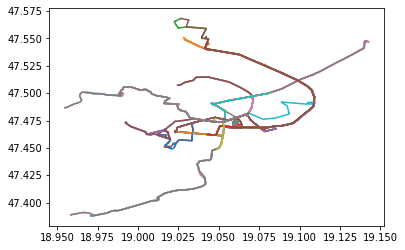

In [ ]:
#Lets see how these lines look like (The datashader one will be much better)
for i in shapes_I["geometry"]:
    x,y=i.coords.xy
    plt.plot(x,y)
    plt.scatter(I_building[1], I_building[0])
plt.show()

In [ ]:
#Now we filter in the Trips DataFrame becouse it has Route IDs and we drop the duplicates
trips_I=trips[trips["shape_id"].isin(shapes_I["shape_id"])]
trips_I.drop_duplicates(subset=["route_id"])

trip_id route_id          service_id  direction_id shape_id
1446   C34268105116     3060   C34268REHHKMK-011             1     B692
1484   C34268120869     3040   C34268REHHKMK-011             0     0977
7436      C50522131     1530    C50522AHCKVA-011             1     DX77
7440     C505221645     1540    C50522AHCKVA-011             1     RM50
16250    C530791140     9180    C53079AHPMAA-021             1     VN42
18201   C537446103J     3410    C53744AHCPJ-0051             1     TL38
20469    C540151008     1335   C54015TOHCMAA-011             0     SB39
24651      C5450110     1070    C54501AHCWA-0011             0     BM09
31736    C547346553     2120    C54734AHCCsZ-031             1     QH60
31743    C547346581     2121    C54734AHCCsZ-031             0     XD69
31751    C547346611     2122    C54734AHCCsZ-031             0     XS57
31958     C54746106     0330    C54746AHCMAA-031             0     XC11
32099       C547871     3010  C54787RAAHHMAA-021             0     N087
34332  C5494311793J     3170  C54943RAAHHSZL-031             0     NQ46
39977     C55600102     9010    C55600AHPSZB-011             0     RA04

In [ ]:
#And now we can filter the routes with the route ID so we can have the routes that has stops within a 600m radius of the I building
routes_I=routes[routes["route_id"].isin(trips_I["route_id"])]
routes_I

agency_id route_id route_short_name route_long_name  route_type  \
28        BKK     0330               33             NaN           3   
85        BKK     1070              107             NaN           3   
114       BKK     1335             133E             NaN           3   
135       BKK     1530              153             NaN           3   
136       BKK     1540              154             NaN           3   
184       BKK     2120              212             NaN           3   
185       BKK     2121             212A             NaN           3   
186       BKK     2122             212B             NaN           3   
240       BKK     3010                1             NaN           0   
246       BKK     3040                4             NaN           0   
247       BKK     3060                6             NaN           0   
250       BKK     3170               17             NaN           0   
257       BKK     3410               41             NaN           0   
296       BKK     9010              901             NaN           3   
303       BKK     9180              918             NaN           3   

                                            route_desc route_color  \
28    M√≥ricz Zsigmond k√∂rt√©r M / Nagyt√©t√©ny, ipartelep      009EE3   
85                      BudaPart / Keleti p√°lyaudvar M      009EE3   
114  √öjpalota, Ny√≠rpalota √∫t / Nagyt√©t√©ny, Erd√©lyi ...      009EE3   
135   Infopark (P√°zm√°ny P√©ter s√©t√°ny) / Gazdagr√©ti t√©r      009EE3   
136                          BudaPart / Gazdagr√©ti t√©r      009EE3   
184           Bor√°ros t√©r H / Normafa, l√°togat√≥k√∂zpont      009EE3   
185                           Bor√°ros t√©r H / Sv√°bhegy      009EE3   
186                   Bor√°ros t√©r H / Csilleb√©rc, KFKI      009EE3   
240  Kelenf√∂ld vas√∫t√°llom√°s M / B√©csi √∫t / V√∂r√∂sv√°r...      FFD800   
246              Sz√©ll K√°lm√°n t√©r M / √öjbuda-k√∂zpont M      FFD800   
247      Sz√©ll K√°lm√°n t√©r M / M√≥ricz Zsigmond k√∂rt√©r M      FFD800   
250              Savoya Park / B√©csi √∫t / V√∂r√∂sv√°ri √∫t      FFD800   
257        B√©csi √∫t / V√∂r√∂sv√°ri √∫t / Budafok kocsisz√≠n      FFD800   
296  Kelenf√∂ld vas√∫t√°llom√°s M / B√©csi √∫t / V√∂r√∂sv√°r...      000000   
303   Kelenf√∂ld vas√∫t√°llom√°s M / √ìbudai aut√≥buszgar√°zs      000000   

    route_text_color route_sort_order  
28            FFFFFF               59  
85            FFFFFF              158  
114           FFFFFF              188  
135           FFFFFF              209  
136           FFFFFF              210  
184           FFFFFF              258  
185           FFFFFF              259  
186           FFFFFF              260  
240           000000               14  
246           000000               22  
247           000000               24  
250           000000               39  
257           000000               72  
296           FFFFFF              326  
303           FFFFFF              335

In [ ]:
# Now we need filter the stops that are between 7:15 and 7:50 
# (so we still have the 10 minutes to walk to the building)
#The DataFrame stop_times has the times in second so we converted these
stop_7=stop_times[stop_times["arrival_time"]<28200]
stop_7=stop_7[stop_7["arrival_time"]>26100]
stop_7.reset_index(drop=True, inplace=True)

In [ ]:
#we have the times and we filter the stops that are in the radius
stop_7_8=stop_7[stop_7["stop_id"].isin(stops_I["stop_id"])]
stop_7_8

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
654    C34268106997  F02153       26520.0         26520.0              1   
655    C34268106997  F02225       26580.0         26580.0              2   
672     C3426814107  F02153       27480.0         27480.0              1   
673     C3426814107  F02225       27540.0         27540.0              2   
766      C342682005  F01992       26160.0         26160.0              1   
...             ...     ...           ...             ...            ...   
25147   C5478720734  066452       27840.0         27840.0              7   
25186   C5478732343  066451       26220.0         26220.0             24   
25187   C5478732343  066453       26280.0         26280.0             25   
25200   C5478732344  066454       27960.0         27960.0              6   
25201   C5478732344  066452       28020.0         28020.0              7   

                  stop_headsign  pickup_type drop_off_type  \
654          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
655          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
672          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
673          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
766          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
...                         ...          ...           ...   
25147   B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   
25186  Kelenf√∂ld vas√∫t√°llom√°s M          NaN           NaN   
25187  Kelenf√∂ld vas√∫t√°llom√°s M          NaN           NaN   
25200   B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   
25201   B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   

       shape_dist_traveled route_id  ... direction_id  shape_id  \
654                  477.0     3060  ...            1      B692   
655                  960.0     3060  ...            1      B692   
672                  477.0     3060  ...            1      B692   
673                  960.0     3060  ...            1      B692   
766                  546.0     3040  ...            1      0976   
...                    ...      ...  ...          ...       ...   
25147               3653.0     3010  ...            0      N087   
25186              14504.0     3010  ...            1      N088   
25187              14970.0     3010  ...            1      N088   
25200               3181.0     3010  ...            0      N087   
25201               3653.0     3010  ...            0      N087   

                               stop_name stop_code location_type  \
654    Budafoki √∫t / Karinthy Frigyes √∫t       NaN           NaN   
655              Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN           NaN   
672    Budafoki √∫t / Karinthy Frigyes √∫t       NaN           NaN   
673              Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN           NaN   
766            Budafoki √∫t / Szer√©mi sor       NaN           NaN   
...                                  ...       ...           ...   
25147                           Infopark       NaN           NaN   
25186                           Infopark       NaN           NaN   
25187         Budafoki √∫t / Domb√≥v√°ri √∫t       NaN           NaN   
25200         Budafoki √∫t / Domb√≥v√°ri √∫t       NaN           NaN   
25201                           Infopark       NaN           NaN   

       location_sub_type parent_station wheelchair_boarding  stop_direction  \
654                  NaN            NaN                 1.0             114   
655                  NaN            NaN                 1.0              54   
672                  NaN            NaN                 1.0             114   
673                  NaN            NaN                 1.0              54   
766                  NaN            NaN                 1.0              55   
...                  ...            ...                 ...             ...   
25147                NaN            NaN                 1.0              96   
25186                NaN        

In [ ]:
#we created a small dictionary to be able to see the stops short names 
# (the ones that we see on the vehicles) and added them to the df
values_dict={"3060":"6", "3040":"4", "1530":"153", "1540":"154", "1335":"133E", '1070':'107', '2120':'212', '2121':"212A",
       '2122':"212B", '0330':"33", '3010':"1"}
short_names=[]
for i in stop_7_8["route_id"]:
    for k in values_dict:
        if i==k:
            short_names.append(values_dict[k])
stop_7_8["short_names"]=short_names
stop_7_8
    

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
654    C34268106997  F02153       26520.0         26520.0              1   
655    C34268106997  F02225       26580.0         26580.0              2   
672     C3426814107  F02153       27480.0         27480.0              1   
673     C3426814107  F02225       27540.0         27540.0              2   
766      C342682005  F01992       26160.0         26160.0              1   
...             ...     ...           ...             ...            ...   
25147   C5478720734  066452       27840.0         27840.0              7   
25186   C5478732343  066451       26220.0         26220.0             24   
25187   C5478732343  066453       26280.0         26280.0             25   
25200   C5478732344  066454       27960.0         27960.0              6   
25201   C5478732344  066452       28020.0         28020.0              7   

                  stop_headsign  pickup_type drop_off_type  \
654          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
655          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
672          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
673          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
766          Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
...                         ...          ...           ...   
25147   B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   
25186  Kelenf√∂ld vas√∫t√°llom√°s M          NaN           NaN   
25187  Kelenf√∂ld vas√∫t√°llom√°s M          NaN           NaN   
25200   B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   
25201   B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   

       shape_dist_traveled route_id  ... shape_id  \
654                  477.0     3060  ...     B692   
655                  960.0     3060  ...     B692   
672                  477.0     3060  ...     B692   
673                  960.0     3060  ...     B692   
766                  546.0     3040  ...     0976   
...                    ...      ...  ...      ...   
25147               3653.0     3010  ...     N087   
25186              14504.0     3010  ...     N088   
25187              14970.0     3010  ...     N088   
25200               3181.0     3010  ...     N087   
25201               3653.0     3010  ...     N087   

                               stop_name stop_code location_type  \
654    Budafoki √∫t / Karinthy Frigyes √∫t       NaN           NaN   
655              Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN           NaN   
672    Budafoki √∫t / Karinthy Frigyes √∫t       NaN           NaN   
673              Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN           NaN   
766            Budafoki √∫t / Szer√©mi sor       NaN           NaN   
...                                  ...       ...           ...   
25147                           Infopark       NaN           NaN   
25186                           Infopark       NaN           NaN   
25187         Budafoki √∫t / Domb√≥v√°ri √∫t       NaN           NaN   
25200         Budafoki √∫t / Domb√≥v√°ri √∫t       NaN           NaN   
25201                           Infopark       NaN           NaN   

      location_sub_type  parent_station wheelchair_boarding stop_direction  \
654                 NaN             NaN                 1.0            114   
655                 NaN             NaN                 1.0             54   
672                 NaN             NaN                 1.0            114   
673                 NaN             NaN                 1.0             54   
766                 NaN             NaN                 1.0             55   
...                 ...             ...                 ...            ...   
25147               NaN             NaN                 1.0             96   
25186               NaN             NaN                 1.0            -85   
25187               NaN             NaN                 1.0            -75   
25200               NaN             NaN             

In [ ]:
#We have the stops but we need the whole Pathways so we filter those with the trip_id
#scince it containts the whole routes
pathways_7_8=stop_times[stop_times["trip_id"].isin(stop_7_8["trip_id"])]


In [ ]:
#And we also add the short names to it
short_names=[]
for i in pathways_7_8["route_id"]:
    for k in values_dict:
        if i==k:
            short_names.append(values_dict[k])
pathways_7_8["short_names"]=short_names
pathways_7_8.reset_index(drop=True, inplace=True)
pathways_7_8.head()

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
0  C34268106997  009220       26400.0         26400.0              0   
1  C34268106997  F02153       26520.0         26520.0              1   
2  C34268106997  F02225       26580.0         26580.0              2   
3  C34268106997  F01374       26700.0         26700.0              3   
4  C34268106997  F01380       26820.0         26820.0              4   

        stop_headsign  pickup_type drop_off_type  shape_dist_traveled  \
0  Sz√©ll K√°lm√°n t√©r M          NaN             1                  0.0   
1  Sz√©ll K√°lm√°n t√©r M          NaN           NaN                477.0   
2  Sz√©ll K√°lm√°n t√©r M          NaN           NaN                960.0   
3  Sz√©ll K√°lm√°n t√©r M          NaN           NaN               1622.0   
4  Sz√©ll K√°lm√°n t√©r M          NaN           NaN               1942.0   

  route_id  ... shape_id                          stop_name stop_code  \
0     3060  ...     B692           M√≥ricz Zsigmond k√∂rt√©r M       NaN   
1     3060  ...     B692  Budafoki √∫t / Karinthy Frigyes √∫t       NaN   
2     3060  ...     B692            Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN   
3     3060  ...     B692                      Bor√°ros t√©r H       NaN   
4     3060  ...     B692         Mester utca / Ferenc k√∂r√∫t       NaN   

  location_type location_sub_type  parent_station wheelchair_boarding  \
0           NaN               NaN             NaN                 1.0   
1           NaN               NaN             NaN                 1.0   
2           NaN               NaN             NaN                 1.0   
3           NaN               NaN             NaN                 2.0   
4           NaN               NaN             NaN                 1.0   

  stop_direction                   geometry short_names  
0            NaN  POINT (19.04835 47.47750)           6  
1            114  POINT (19.05411 47.47583)           6  
2             54  POINT (19.05959 47.47693)           6  
3             54  POINT (19.06670 47.48038)           6  
4             14  POINT (19.06885 47.48275)           6  

[5 rows x 22 columns]

In [ ]:
pathways_7_8["short_names"].value_counts()

1       640
133E    354
4       323
6       304
33      124
212     114
153     108
107      94
154      92
212A     71
212B     35
Name: short_names, dtype: int64

In [ ]:
pathways_7_8[pathways_7_8["trip_id"]=="C34268106997"][["departure_time", "stop_name","short_names"]]["departure_time"].apply(lambda x: abs(x-26580.0))

0      180.0
1       60.0
2        0.0
3      120.0
4      240.0
5      300.0
6      420.0
7      480.0
8      600.0
9      660.0
10     720.0
11     840.0
12     960.0
13    1080.0
14    1200.0
15    1260.0
16    1380.0
17    1500.0
18    1620.0
Name: departure_time, dtype: float64

In [ ]:
my=dict(zip(pathways_7_8["trip_id"],pathways_7_8["short_names"]))
temp=[]
res={}
for i,k in my.items():
    if k not in temp:
        temp.append(k)
        res[i]=k
res

{'C34268106997': '6',
 'C342682005': '4',
 'C50522179': '153',
 'C50522201': '154',
 'C54015135': '133E',
 'C5450110': '107',
 'C547346653': '212',
 'C547346659': '212A',
 'C547346683': '212B',
 'C5474657': '33',
 'C5478717602': '1'}

In [ ]:
list(res.keys())

['C34268106997',
 'C342682005',
 'C50522179',
 'C50522201',
 'C54015135',
 'C5450110',
 'C547346653',
 'C547346659',
 'C547346683',
 'C5474657',
 'C5478717602']

In [ ]:
pathways_one=pathways_7_8[pathways_7_8["trip_id"].isin(res.keys())]

In [ ]:
for_loop=pathways_7_8["short_names"].unique()
for_loop

array(['6', '4', '153', '154', '133E', '107', '212', '212A', '212B', '33',
       '1'], dtype=object)

In [ ]:
time_from_origin=[]
stoppyka=stops_I.drop_duplicates(subset="stop_name")["stop_name"]
for i in for_loop:
    route=pathways_one[pathways_one["short_names"]==i]
    dep_time=list(route[route["stop_name"].isin(stoppyka)]["departure_time"])[0]
    time_from_origin.append(route["departure_time"].apply(lambda x: abs(x-dep_time)))


In [ ]:
len(pathways_one)

300

In [ ]:
time_from_origin[0]
flatten_list = [i for s in time_from_origin for i in s]

In [ ]:
times=[]
for i in time_from_origin:
    for k in i:
        times.append(k)

In [ ]:
#function to make seconds to hours and minutes
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
     
    return "%d:%02d:%02d" % (hour, minutes, seconds)


In [ ]:
pathways_one["time_distance"]=times

In [ ]:
pathways_one["time_to_school"]=pathways_one["time_distance"].apply(lambda x: convert(x)+" + 10 minute walk")


In [ ]:
pathways_one

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
0     C34268106997  009220       26400.0         26400.0              0   
1     C34268106997  F02153       26520.0         26520.0              1   
2     C34268106997  F02225       26580.0         26580.0              2   
3     C34268106997  F01374       26700.0         26700.0              3   
4     C34268106997  F01380       26820.0         26820.0              4   
...            ...     ...           ...             ...            ...   
1646   C5478717602  F02527       28260.0         28260.0             27   
1647   C5478717602  F00626       28380.0         28380.0             28   
1648   C5478717602  F00614       28500.0         28500.0             29   
1649   C5478717602  F00586       28560.0         28560.0             30   
1650   C5478717602  F00569       28680.0         28680.0             31   

                stop_headsign  pickup_type drop_off_type  shape_dist_traveled  \
0          Sz√©ll K√°lm√°n t√©r M          NaN             1                  0.0   
1          Sz√©ll K√°lm√°n t√©r M          NaN           NaN                477.0   
2          Sz√©ll K√°lm√°n t√©r M          NaN           NaN                960.0   
3          Sz√©ll K√°lm√°n t√©r M          NaN           NaN               1622.0   
4          Sz√©ll K√°lm√°n t√©r M          NaN           NaN               1942.0   
...                       ...          ...           ...                  ...   
1646  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              15414.0   
1647  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              16515.0   
1648  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              16981.0   
1649  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              17680.0   
1650  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              18124.0   

     route_id  ... stop_code  location_type location_sub_type parent_station  \
0        3060  ...       NaN            NaN               NaN            NaN   
1        3060  ...       NaN            NaN               NaN            NaN   
2        3060  ...       NaN            NaN               NaN            NaN   
3        3060  ...       NaN            NaN               NaN            NaN   
4        3060  ...       NaN            NaN               NaN            NaN   
...       ...  ...       ...            ...               ...            ...   
1646     3010  ...       NaN            NaN               NaN            NaN   
1647     3010  ...       NaN            NaN               NaN            NaN   
1648     3010  ...       NaN            NaN               NaN            NaN   
1649     3010  ...       NaN            NaN               NaN            NaN   
1650     3010  ...       NaN            NaN               NaN            NaN   

     wheelchair_boarding  stop_direction                   geometry  \
0                    1.0             NaN  POINT (19.04835 47.47750)   
1                    1.0             114  POINT (19.05411 47.47583)   
2                    1.0              54  POINT (19.05959 47.47693)   
3                    2.0              54  POINT (19.06670 47.48038)   
4                    1.0              14  POINT (19.06885 47.48275)   
...                  ...             ...                        ...   
1646                 1.0             -73  POINT (19.05887 47.53629)   
1647                 1.0             -73  POINT (19.04521 47.53959)   
1648                 1.0             -50  POINT (19.03996 47.54152)   
1649                 1.0             -42  POINT (19.03346 47.54596)   
1650                 1.0             NaN  POINT (19.02937 47.54877)   

     short_names  time_distance            time_to_school  
0              6          120.0  0:02:00 + 10 minute walk  
1              6            0.0  0:00:00 + 10 minute walk  
2              6           60.0  0:01:00 + 10 minute walk  
3              6          180.0  

In [ ]:
pathways_one["time_distance"]=pathways_one["time_distance"].apply(lambda x: 200 if x==0 else 1/x*10000)
#pathways_one["time_distance"]=pathways_one["time_distance"].apply(lambda x: 0.01 if x==0 else 1/x)

In [ ]:
#making a df just for the data we need
geometry_x=[]
geometry_y=[]
for i in pathways_one["geometry"]:
    geometry_x.append(i.x)
    geometry_y.append(i.y)
geometry_x_tuple=tuple(geometry_x)
geometry_y_tuple=tuple(geometry_y)
geometry_df=pd.DataFrame({
    'x_coor':geometry_x_tuple,
    'y_coor':geometry_y_tuple,
    'stop_name':pathways_one['stop_name'],
    "z":pathways_one["time_distance"]
})
mmt=[]

map_values1 = geometry_df[['y_coor','x_coor','z']]
data = map_values1.values.tolist()
              

In [ ]:
geometry_df["time_to_school"]=pathways_one["time_to_school"]

In [ ]:
geometry_df["vehicle"]=pathways_one["short_names"]

geometry_df

In [ ]:
geometry_df

x_coor     y_coor                          stop_name           z  \
0     19.048349  47.477499           M√≥ricz Zsigmond k√∂rt√©r M   83.333333   
1     19.054107  47.475827  Budafoki √∫t / Karinthy Frigyes √∫t  200.000000   
2     19.059586  47.476933            Pet≈ëfi h√≠d, budai h√≠df≈ë  166.666667   
3     19.066698  47.480376                      Bor√°ros t√©r H   55.555556   
4     19.068848  47.482751         Mester utca / Ferenc k√∂r√∫t   33.333333   
...         ...        ...                                ...         ...   
1646  19.058868  47.536294          N√©pf√ºrd≈ë utca / √Årp√°d h√≠d    4.629630   
1647  19.045207  47.539593                   Szentl√©lek t√©r H    4.385965   
1648  19.039960  47.541517                        Fl√≥ri√°n t√©r    4.166667   
1649  19.033456  47.545957              √ìbudai rendel≈ëint√©zet    4.065041   
1650  19.029370  47.548766            B√©csi √∫t / V√∂r√∂sv√°ri √∫t    3.875969   

                time_to_school vehicle  
0     0:02:00 + 10 minute walk       6  
1     0:00:00 + 10 minute walk       6  
2     0:01:00 + 10 minute walk       6  
3     0:03:00 + 10 minute walk       6  
4     0:05:00 + 10 minute walk       6  
...                        ...     ...  
1646  0:36:00 + 10 minute walk       1  
1647  0:38:00 + 10 minute walk       1  
1648  0:40:00 + 10 minute walk       1  
1649  0:41:00 + 10 minute walk       1  
1650  0:43:00 + 10 minute walk       1  

[300 rows x 6 columns]


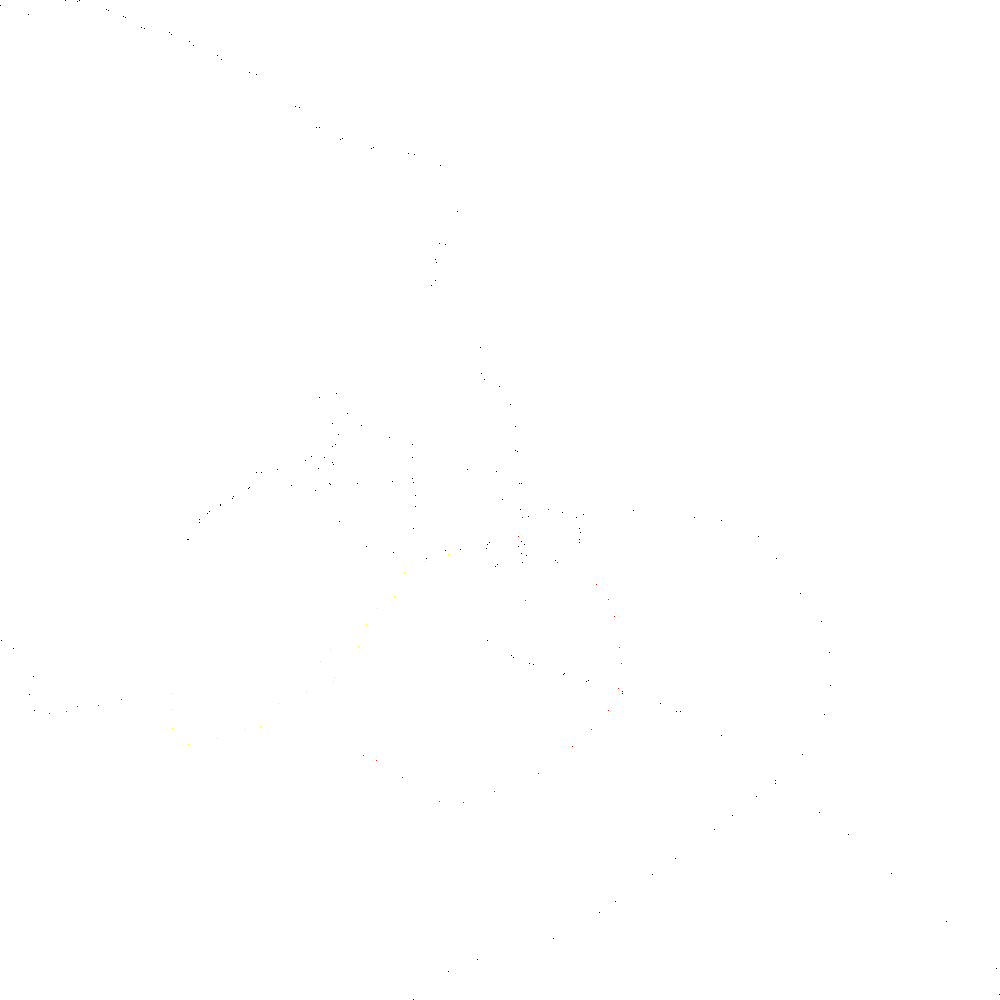

In [ ]:
#import pandas as pd
#!pip install plotly
import plotly.express as px
dff = geometry_df.query('y_coor < 47.548766').query('y_coor > 47.387982').query('x_coor > 18.954419').query('x_coor < 19.142015')
#bme_i = 47.47277215114886, 19.060034103922074
import plotly
#datashader steps
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(dff, x='x_coor', y='y_coor')
# agg is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = agg.coords['y_coor'].values, agg.coords['x_coor'].values
# Corners of the image, which need to be passed to mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]

from colorcet import fire
import plotly.graph_objects as go
import datashader.transfer_functions as tf
img = tf.shade(agg, cmap=fire)[::-1].to_pil()

import plotly.express as px
# Trick to create rapidly a figure with mapbox axes
#fig = px.density_mapbox(geometry_df, lat=geometry_df.y_coor, lon= geometry_df.x_coor,zoom=12, hover_name='stop_name', 
#                        hover_data=["x_coor", "y_coor"], radius=5, labels={'get_on':'get_on', 'time_to_school':'time_to_school'})
fig = px.density_mapbox(geometry_df, lat = geometry_df.y_coor, lon = geometry_df.x_coor, z=geometry_df.z,
                        radius=20,
                        hover_name="stop_name",
                        hover_data=["x_coor","y_coor","time_to_school","vehicle"],
                        center = dict(lat = 47.47277215114886, lon = 19.060034103922074),
                        zoom = 12,
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = 'rainbow',
                        )


#point to BME
fig.add_trace(go.Scattermapbox(
        lat=[47.47277215114886],
        lon=[19.060034103922074],
        marker=go.scattermapbox.Marker(
            size=10,
            color='rgb(0, 144, 144)',
            opacity=0.7
        ),
        text=["BME I Epulet"],
    ) )
# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-darkmatter",
                 mapbox_layers = [
                {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                }]
)
fig.show()

In [ ]:
geometry_df.reset_index(inplace=True)

In [ ]:
import folium
from folium.plugins import HeatMap


In [ ]:
map_values1 = geometry_df[['y_coor','x_coor','z']]
data = map_values1.values.tolist()

In [ ]:
I_building=(47.47282880598328, 19.060057869533754)
#Define coordinates of where we want to center our map
boulder_coords = [I_building[0], I_building[1]]



#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 13,)
for i in range(len(geometry_df)):
    folium.Circle((geometry_df["y_coor"][i], geometry_df["x_coor"][i]), fill_color = 200,
                            radius = 100+geometry_df["z"][i], popup=geometry_df["stop_name"][i]).add_to(my_map)


hm = HeatMap(data,gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}, 
                min_opacity=0.4, 
                max_opacity=0.9, 
                radius=25,
                use_local_extrema=False).add_to(my_map)
#Display the map
my_map

In [ ]:
shapes_I

In [ ]:
import shapely

In [ ]:
lats = []
lons = []
names = []

for feature, name in zip(shapes_I.geometry, shapes_I["shape_id"]):
    if isinstance(feature, shapely.geometry.linestring.LineString):
        linestrings = [feature]
    elif isinstance(feature, shapely.geometry.multilinestring.MultiLineString):
        linestrings = feature.geoms
    else:
        continue
    for linestring in linestrings:
        x, y = linestring.xy
        lats = np.append(lats, y)
        lons = np.append(lons, x)
        names = np.append(names, [name]*len(y))
        lats = np.append(lats, None)
        lons = np.append(lons, None)
        names = np.append(names, None)


In [ ]:
fig = px.line_mapbox(lat=lats, lon=lons, hover_name=names)

fig.update_layout(mapbox_style="carto-darkmatter",
                  mapbox_zoom=10,
                  
                  margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
#Create a list that stores the linestrings of pathways that intercept the stops in the 
# previus DataFrame 
points_with_linestr=[]
points=[]
for i in shapes["geometry"]:
    for k in pathways_7_8["geometry"]:
        if (i.distance(k)<1e-8) and i not in points_with_linestr:
            x,y=k.xy
            points.append(k)
            #x,y=i.coords.xy
            #points_intercept.append((tuple(x), tuple(y)))
            points_with_linestr.append(i)

In [ ]:
stops_intercept_rendes=stop_times[stop_times["geometry"].isin(points)]
stops_intercept_rendes

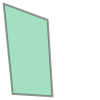

In [ ]:
from shapely import geometry
egy=(47.44686676822845, 18.965463583916762)
ketto=(47.5655472483503, 18.958243438356227)
harom=(47.55125478363083, 19.185918695031727)
negy=(47.42016738759728, 19.234534341805986)
point_list=[egy,ketto,harom,negy]
p = geometry.Polygon(point_list)
p

In [ ]:
import folium
m = folium.Map(tiles='openstreetmap')
m.fit_bounds([[egy[0], egy[1]], [ketto[0], ketto[1]]])
folium.GeoJson(poly).add_to(m)
m

In [ ]:
!pip install qgis-plugin-ci

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 10.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 291 kB 17.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.4 MB 18.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 662 kB 62.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 62 kB 1.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 856 kB 36.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 59.9 MB 1.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚

In [ ]:
from qgis.core import *
from qgis.PyQt.QtCore import QVariant

def cut_polygon_into_windows(p, window_height, window_width):

    crs = p.crs().toWkt()
    extent = p.extent()
    (xmin, xmax, ymin, ymax) = (extent.xMinimum(), extent.xMaximum(), extent.yMinimum(), extent.yMaximum())

    # Create the grid layer
    vector_grid = QgsVectorLayer('Polygon?crs='+ crs, 'vector_grid' , 'memory')
    prov = vector_grid.dataProvider()

    # Create the grid layer
    output = QgsVectorLayer('Polygon?crs='+ crs, 'output' , 'memory')
    outprov = output.dataProvider()

    # Add ids and coordinates fields
    fields = QgsFields()
    fields.append(QgsField('ID', QVariant.Int, '', 10, 0))
    outprov.addAttributes(fields)

    # Generate the features for the vector grid
    id = 0
    y = ymax
    while y >= ymin:
        x = xmin
        while x <= xmax:
            point1 = QgsPoint(x, y)
            point2 = QgsPoint(x + window_width, y)
            point3 = QgsPoint(x + window_width, y - window_height)
            point4 = QgsPoint(x, y - window_height)
            vertices = [point1, point2, point3, point4] # Vertices of the polygon for the current id
            inAttr = [id]
            feat = QgsFeature()
            feat.setGeometry(QgsGeometry().fromPolygon([vertices])) # Set geometry for the current id
            feat.setAttributes(inAttr) # Set attributes for the current id
            prov.addFeatures([feat])
            x = x + window_width
            id += 1
        y = y - window_height

    index = QgsSpatialIndex() # Spatial index
    for ft in vector_grid.getFeatures():
        index.insertFeature(ft)

    for feat in p.getFeatures():
        geom = feat.geometry()
        idsList = index.intersects(geom.boundingBox())
        for gridfeat in vector_grid.getFeatures(QgsFeatureRequest().setFilterFids(idsList)):
            tmp_geom = QgsGeometry(gridfeat.geometry())
            tmp_attrs = gridfeat.attributes()
            if geom.intersects(tmp_geom):
                int = QgsGeometry(geom.intersection(tmp_geom))
                outfeat = QgsFeature()
                outfeat.setGeometry(int)
                outfeat.setAttributes(tmp_attrs)
                outprov.addFeatures([outfeat])

    output.updateFields()

    return output
window_width = 3
window_height = 3

# Run the function
output = cut_polygon_into_windows(p, window_height, window_width)

# Add the layer to the Layers panel
QgsMapLayerRegistry.instance().addMapLayers([output])


ModuleNotFoundError: ignored

In [ ]:
# now we filter the shapes with these strings so it only contains the routes 
# that intercept the stops
shapes_intercept=shapes[shapes["geometry"].isin(points_with_linestr)]
shapes_intercept

shape_id                                           geometry
2        0976  LINESTRING (19.04686 47.47404, 19.04688 47.474...
3        0977  LINESTRING (19.02519 47.50723, 19.02518 47.507...
77       2064  LINESTRING (19.07132 47.49604, 19.07127 47.496...
117      7404  LINESTRING (19.09142 47.47069, 19.09139 47.470...
126      A776  LINESTRING (19.00526 47.43212, 19.00518 47.432...
...       ...                                                ...
1292     Z255  LINESTRING (18.94023 47.45575, 18.94028 47.455...
1293     Z262  LINESTRING (19.01378 47.40563, 19.01375 47.405...
1295     Z545  LINESTRING (19.01851 47.46434, 19.01864 47.464...
1296     Z546  LINESTRING (18.92367 47.51776, 18.92387 47.517...
1297     Z895  LINESTRING (18.99852 47.49470, 18.99843 47.494...

[371 rows x 2 columns]

In [ ]:
#Now find the trips and from that the stops
trips_intercept=trips[trips["shape_id"].isin(shapes_intercept["shape_id"])]
stops_intercept=stop_times[stop_times["trip_id"].isin(trips_intercept["trip_id"])]
stops_intercept

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
15107   C34268105116  009220       25200.0         25200.0              0   
15108   C34268105116  F02153       25320.0         25320.0              1   
15109   C34268105116  F02225       25380.0         25380.0              2   
15110   C34268105116  F01374       25500.0         25500.0              3   
15111   C34268105116  F01380       25620.0         25620.0              4   
...              ...     ...           ...             ...            ...   
799978     C56119974  F02980       32580.0         32580.0              8   
799979     C56119974  F02924       32700.0         32700.0              9   
799980     C56119974  F02893       32760.0         32760.0             10   
799981     C56119974  F02631       32880.0         32880.0             11   
799982     C56119974  F02591       33000.0         33000.0             12   

                                 stop_headsign  pickup_type drop_off_type  \
15107                       Sz√©ll K√°lm√°n t√©r M          NaN             1   
15108                       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
15109                       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
15110                       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
15111                       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
...                                        ...          ...           ...   
799978  KOCSISZ√çNBE  Lehel u. / R√≥bert K. krt.          NaN           NaN   
799979  KOCSISZ√çNBE  Lehel u. / R√≥bert K. krt.          NaN           NaN   
799980  KOCSISZ√çNBE  Lehel u. / R√≥bert K. krt.          NaN           NaN   
799981  KOCSISZ√çNBE  Lehel u. / R√≥bert K. krt.          NaN           NaN   
799982  KOCSISZ√çNBE  Lehel u. / R√≥bert K. krt.          NaN           NaN   

        shape_dist_traveled route_id  ... direction_id  shape_id  \
15107                   0.0     3060  ...            1      B692   
15108                 477.0     3060  ...            1      B692   
15109                 960.0     3060  ...            1      B692   
15110                1622.0     3060  ...            1      B692   
15111                1942.0     3060  ...            1      B692   
...                     ...      ...  ...          ...       ...   
799978               4694.0     3014  ...            0      TI52   
799979               5169.0     3014  ...            0      TI52   
799980               5527.0     3014  ...            0      TI52   
799981               6271.0     3014  ...            0      TI52   
799982               6659.0     3014  ...            0      TI52   

                                stop_name stop_code location_type  \
15107            M√≥ricz Zsigmond k√∂rt√©r M       NaN           NaN   
15108   Budafoki √∫t / Karinthy Frigyes √∫t       NaN           NaN   
15109             Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN           NaN   
15110                       Bor√°ros t√©r H       NaN           NaN   
15111          Mester utca / Ferenc k√∂r√∫t       NaN           NaN   
...                                   ...       ...           ...   
799978                   Ajt√≥si D√ºrer sor       NaN           NaN   
799979   Erzs√©bet kir√°lyn√© √∫tja, alulj√°r√≥       NaN           NaN   
799980                  Kacs√≥h Pongr√°c √∫t       NaN           NaN   
799981  V√°g√°ny utca / R√≥bert K√°roly k√∂r√∫t       NaN           NaN   
799982   Lehel utca / R√≥bert K√°roly k√∂r√∫t       NaN           NaN   

        location_sub_type parent_station wheelchair_boarding  stop_direction  \
15107                 NaN            NaN                 1.0             NaN   
15108                 NaN            NaN                 1.0             114   
15109                 NaN            NaN                 1.0              54   
15110                 NaN            NaN                 2.0              54   
15111                 NaN            NaN             

In [ ]:
#and we filter for time from 7:15-7:50 like before
stops_intercept_7_8=stops_intercept[stops_intercept["arrival_time"]<28200]
stops_intercept_7_8=stops_intercept_7_8[stops_intercept_7_8["arrival_time"]>26100]

In [ ]:
#and add the short names
values_dict=dict(zip(routes["route_id"], routes["route_short_name"]))
short_names=[]
for i in stops_intercept_7_8["route_id"]:
    for k in values_dict:
        if i==k:
            short_names.append(values_dict[k])
stops_intercept_7_8["short_names"]=short_names
stops_intercept_7_8

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
15118   C34268105116  F01082       26220.0         26220.0             11   
15119   C34268105116  F00933       26340.0         26340.0             12   
15120   C34268105116  F00925       26460.0         26460.0             13   
15121   C34268105116  F00141       26580.0         26580.0             14   
15122   C34268105116  F00192       26640.0         26640.0             15   
...              ...     ...           ...             ...            ...   
799486      C5611982  008262       26280.0         26280.0             16   
799487      C5611982  008148       26400.0         26400.0             17   
799488      C5611982  008146       26460.0         26460.0             18   
799489      C5611982  F01286       26580.0         26580.0             19   
799536      C5611983  F01286       26160.0         26160.0             19   

             stop_headsign  pickup_type drop_off_type  shape_dist_traveled  \
15118   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               4773.0   
15119   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               5454.0   
15120   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               6141.0   
15121   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               6621.0   
15122   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               6953.0   
...                    ...          ...           ...                  ...   
799486          N√©pliget M          NaN           NaN               9379.0   
799487          N√©pliget M          NaN           NaN               9955.0   
799488          N√©pliget M          NaN           NaN              10529.0   
799489          N√©pliget M          1.0           NaN              11223.0   
799536          N√©pliget M          1.0           NaN              11223.0   

       route_id  ... shape_id                           stop_name stop_code  \
15118      3060  ...     B692                           Oktogon M       NaN   
15119      3060  ...     B692                Nyugati p√°lyaudvar M       NaN   
15120      3060  ...     B692                     J√°szai Mari t√©r       NaN   
15121      3060  ...     B692           Margitsziget / Margit h√≠d       NaN   
15122      3060  ...     B692           Margit h√≠d, budai h√≠df≈ë H       NaN   
...         ...  ...      ...                                 ...       ...   
799486     3014  ...     TC22            Hidegkuti N√°ndor Stadion       NaN   
799487     3014  ...     TC22  K≈ëb√°nyai √∫t / K√∂nyves K√°lm√°n k√∂r√∫t       NaN   
799488     3014  ...     TC22                    Vajda P√©ter utca       NaN   
799489     3014  ...     TC22                          N√©pliget M       NaN   
799536     3014  ...     TC22                          N√©pliget M       NaN   

       location_type location_sub_type  parent_station wheelchair_boarding  \
15118            NaN               NaN             NaN                 1.0   
15119            NaN               NaN             NaN                 1.0   
15120            NaN               NaN             NaN                 1.0   
15121            NaN               NaN             NaN                 1.0   
15122            NaN               NaN             NaN                 1.0   
...              ...               ...             ...                 ...   
799486           NaN               NaN             NaN                 1.0   
799487           NaN               NaN             NaN                 1.0   
799488           NaN               NaN             NaN                 1.0   
799489           NaN               NaN             NaN                 1.0   
799536           NaN               NaN             NaN                 1.0   

       stop_direction                   geometry short_names  
15118             -43  POINT (19.06241 47.50594)           6  
15119             -56  POINT (19.05617 47.51027)           6  
15120             -67  POINT (19

In [ ]:
pathways_7_8["short_names"].value_counts()

1       640
133E    354
4       323
6       304
33      124
212     114
153     108
107      94
154      92
212A     71
212B     35
Name: short_names, dtype: int64

In [ ]:
#and we save this DF too
stops_intercept_7_8.to_csv("stops_that_intercept_7_8.csv")

In [ ]:
distances=[]
for i in stops_intercept_7_8["geometry"]:
    distances.append(geopy.distance.geodesic(I_building, (i.y,i.x)).m)

In [ ]:
stops_intercept_7_8["distance_I"]=distances

In [ ]:
stops_intercept_7_8

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
15118   C34268105116  F01082       26220.0         26220.0             11   
15119   C34268105116  F00933       26340.0         26340.0             12   
15120   C34268105116  F00925       26460.0         26460.0             13   
15121   C34268105116  F00141       26580.0         26580.0             14   
15122   C34268105116  F00192       26640.0         26640.0             15   
...              ...     ...           ...             ...            ...   
799486      C5611982  008262       26280.0         26280.0             16   
799487      C5611982  008148       26400.0         26400.0             17   
799488      C5611982  008146       26460.0         26460.0             18   
799489      C5611982  F01286       26580.0         26580.0             19   
799536      C5611983  F01286       26160.0         26160.0             19   

             stop_headsign  pickup_type drop_off_type  shape_dist_traveled  \
15118   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               4773.0   
15119   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               5454.0   
15120   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               6141.0   
15121   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               6621.0   
15122   Sz√©ll K√°lm√°n t√©r M          NaN           NaN               6953.0   
...                    ...          ...           ...                  ...   
799486          N√©pliget M          NaN           NaN               9379.0   
799487          N√©pliget M          NaN           NaN               9955.0   
799488          N√©pliget M          NaN           NaN              10529.0   
799489          N√©pliget M          1.0           NaN              11223.0   
799536          N√©pliget M          1.0           NaN              11223.0   

       route_id  ...                           stop_name  stop_code  \
15118      3060  ...                           Oktogon M        NaN   
15119      3060  ...                Nyugati p√°lyaudvar M        NaN   
15120      3060  ...                     J√°szai Mari t√©r        NaN   
15121      3060  ...           Margitsziget / Margit h√≠d        NaN   
15122      3060  ...           Margit h√≠d, budai h√≠df≈ë H        NaN   
...         ...  ...                                 ...        ...   
799486     3014  ...            Hidegkuti N√°ndor Stadion        NaN   
799487     3014  ...  K≈ëb√°nyai √∫t / K√∂nyves K√°lm√°n k√∂r√∫t        NaN   
799488     3014  ...                    Vajda P√©ter utca        NaN   
799489     3014  ...                          N√©pliget M        NaN   
799536     3014  ...                          N√©pliget M        NaN   

       location_type location_sub_type parent_station  wheelchair_boarding  \
15118            NaN               NaN            NaN                  1.0   
15119            NaN               NaN            NaN                  1.0   
15120            NaN               NaN            NaN                  1.0   
15121            NaN               NaN            NaN                  1.0   
15122            NaN               NaN            NaN                  1.0   
...              ...               ...            ...                  ...   
799486           NaN               NaN            NaN                  1.0   
799487           NaN               NaN            NaN                  1.0   
799488           NaN               NaN            NaN                  1.0   
799489           NaN               NaN            NaN                  1.0   
799536           NaN               NaN            NaN                  1.0   

       stop_direction                   geometry  short_names   distance_I  
15118             -43  POINT (19.06241 47.50594)            6  3685.454529  
15119             -56  POINT (19.05617 47.51027)            6  4173.479026  
15120             -67  POINT (19.04818 47.51310)            6  4565.889257  
15121    

In [ ]:
stops_rendes=stops_intercept_7_8[stops_intercept_7_8["geometry"].isin(points)]

In [ ]:
stops_rendes["stop_name"].unique()

array(['Mechwart liget', 'M√≥ricz Zsigmond k√∂rt√©r M',
       'Pet≈ëfi h√≠d, budai h√≠df≈ë', '√öjbuda-k√∂zpont M',
       'Margit h√≠d, budai h√≠df≈ë H', 'Sz√©na t√©r', 'Sz√©ll K√°lm√°n t√©r M',
       'Kosztol√°nyi Dezs≈ë t√©r', 'L√©pcs≈ës utca', 'J√≥kai M√≥r utca',
       '≈êrmezei √∫t', 'Kelenf√∂ld vas√∫t√°llom√°s M',
       'Le√°nyka utcai lak√≥telep', 'V√°rosh√°z t√©r',
       'Zelk Zolt√°n √∫t (Menyecske utca)', 'Gazdagr√©ti √∫t',
       'J√©gvir√°g utca', 'Dayka G√°bor utca', 'Gazdagr√©ti t√©r',
       'Nagyszeben √∫t', 'M√°rcius 15. t√©r', 'Astoria M', 'Sasadi √∫t',
       'Tisza Istv√°n t√©r', 'Zugl√≥ vas√∫t√°llom√°s', 'Keleti p√°lyaudvar M',
       'Blaha Lujza t√©r M', 'Ur√°nia', '√öjpalota, Ny√≠rpalota √∫t',
       'V√°s√°rcsarnok', 'Moln√°r Viktor utca', 'Bosny√°k t√©r', 'F≈ë t√©r',
       'Bik√°s park M', 'Karolina √∫t', 'Dur√°nci utca',
       'Infopark (P√°zm√°ny P√©ter s√©t√°ny)', 'Andor utca / T√©t√©nyi √∫t',
       'Egyetemv√°ros - A38 haj√≥√°llom√°s', 'Budafoki √∫t

In [ ]:
my=dict(zip(stops_intercept_7_8["trip_id"],stops_intercept_7_8["short_names"]))
temp=[]
res={}
for i,k in my.items():
    if k not in temp:
        temp.append(k)
        res[i]=k
res

{'C34268105116': '6',
 'C342681730': '4',
 'C3635065': '49',
 'C3800224': '138',
 'C45939101': '19',
 'C46206404': '250',
 'C46206410': '250B',
 'C46470428': '141',
 'C47110102': '139',
 'C48289101': '8E',
 'C4951840': '58',
 'C5048315': '251A',
 'C5052049': '53',
 'C50522133': '153',
 'C50522192': '154',
 'C5104028': '296',
 'C5104047': '96',
 'C513071031': '59B',
 'C514521399': '114',
 'C51452174': '213',
 'C51452202': '214',
 'C51579111': '101B',
 'C51579116': '101E',
 'C51744101': '150',
 'C5239418': '287',
 'C5241641': '13',
 'C5241647': '113A',
 'C5265328': '240',
 'C52683115': '196',
 'C52683128': '196A',
 'C529511001': '88A',
 'C529511006': '40',
 'C529511011': '40B',
 'C52951118': '88',
 'C529512660': '40E',
 'C5377220': '277',
 'C53823221J': '2',
 'C539901128': '272',
 'C5399011948': '172',
 'C539902658': '173',
 'C54015135': '133E',
 'C5411439': '188E',
 'C54153144': '158',
 'C541541279': '191',
 'C544891275': '291',
 'C544891280': '91',
 'C5450110': '107',
 'C54505176': '20

In [ ]:
list(res.keys())

['C34268105116',
 'C342681730',
 'C3635065',
 'C3800224',
 'C45939101',
 'C46206404',
 'C46206410',
 'C46470428',
 'C47110102',
 'C48289101',
 'C4951840',
 'C5048315',
 'C5052049',
 'C50522133',
 'C50522192',
 'C5104028',
 'C5104047',
 'C513071031',
 'C514521399',
 'C51452174',
 'C51452202',
 'C51579111',
 'C51579116',
 'C51744101',
 'C5239418',
 'C5241641',
 'C5241647',
 'C5265328',
 'C52683115',
 'C52683128',
 'C529511001',
 'C529511006',
 'C529511011',
 'C52951118',
 'C529512660',
 'C5377220',
 'C53823221J',
 'C539901128',
 'C5399011948',
 'C539902658',
 'C54015135',
 'C5411439',
 'C54153144',
 'C541541279',
 'C544891275',
 'C544891280',
 'C5450110',
 'C54505176',
 'C54530103',
 'C5453085',
 'C5458629',
 'C5458637',
 'C54589105',
 'C54589129',
 'C54589153',
 'C54621124',
 'C54621130',
 'C5465922',
 'C547346611',
 'C547346617',
 'C547346629',
 'C5474657',
 'C5478717591',
 'C54854119',
 'C5486312',
 'C54869147',
 'C5489637',
 'C54943114',
 'C5510746',
 'C552751412',
 'C5531540',
 'C55

In [ ]:
pathways_7_8

trip_id stop_id  arrival_time  departure_time  stop_sequence  \
0     C34268106997  009220       26400.0         26400.0              0   
1     C34268106997  F02153       26520.0         26520.0              1   
2     C34268106997  F02225       26580.0         26580.0              2   
3     C34268106997  F01374       26700.0         26700.0              3   
4     C34268106997  F01380       26820.0         26820.0              4   
...            ...     ...           ...             ...            ...   
2254   C5478732344  F02527       30120.0         30120.0             27   
2255   C5478732344  F00626       30240.0         30240.0             28   
2256   C5478732344  F00614       30360.0         30360.0             29   
2257   C5478732344  F00586       30420.0         30420.0             30   
2258   C5478732344  F00569       30540.0         30540.0             31   

                stop_headsign  pickup_type drop_off_type  shape_dist_traveled  \
0          Sz√©ll K√°lm√°n t√©r M          NaN             1                  0.0   
1          Sz√©ll K√°lm√°n t√©r M          NaN           NaN                477.0   
2          Sz√©ll K√°lm√°n t√©r M          NaN           NaN                960.0   
3          Sz√©ll K√°lm√°n t√©r M          NaN           NaN               1622.0   
4          Sz√©ll K√°lm√°n t√©r M          NaN           NaN               1942.0   
...                       ...          ...           ...                  ...   
2254  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              15414.0   
2255  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              16515.0   
2256  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              16981.0   
2257  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              17680.0   
2258  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN              18124.0   

     route_id  ... shape_id                          stop_name stop_code  \
0        3060  ...     B692           M√≥ricz Zsigmond k√∂rt√©r M       NaN   
1        3060  ...     B692  Budafoki √∫t / Karinthy Frigyes √∫t       NaN   
2        3060  ...     B692            Pet≈ëfi h√≠d, budai h√≠df≈ë       NaN   
3        3060  ...     B692                      Bor√°ros t√©r H       NaN   
4        3060  ...     B692         Mester utca / Ferenc k√∂r√∫t       NaN   
...       ...  ...      ...                                ...       ...   
2254     3010  ...     N087          N√©pf√ºrd≈ë utca / √Årp√°d h√≠d       NaN   
2255     3010  ...     N087                   Szentl√©lek t√©r H       NaN   
2256     3010  ...     N087                        Fl√≥ri√°n t√©r       NaN   
2257     3010  ...     N087              √ìbudai rendel≈ëint√©zet       NaN   
2258     3010  ...     N087            B√©csi √∫t / V√∂r√∂sv√°ri √∫t       NaN   

     location_type location_sub_type  parent_station wheelchair_boarding  \
0              NaN               NaN             NaN                 1.0   
1              NaN               NaN             NaN                 1.0   
2              NaN               NaN             NaN                 1.0   
3              NaN               NaN             NaN                 2.0   
4              NaN               NaN             NaN                 1.0   
...            ...               ...             ...                 ...   
2254           NaN               NaN             NaN                 1.0   
2255           NaN               NaN             NaN                 1.0   
2256           NaN               NaN             NaN                 1.0   
2257           NaN               NaN             NaN                 1.0   
2258           NaN               NaN             NaN                 1.0   

     stop_direction                   geometry short_names  
0               NaN  POINT (19.04835 47.47750)           6  
1               114  POINT (19.05411 47.47583)           6  
2                54  POINT (19.05959 47.47693

In [ ]:
intercept_one=stops_intercept_7_8[stops_intercept_7_8["trip_id"].isin(res.keys())]
intercept_one.reset_index(inplace=True)
intercept_one=intercept_one[intercept_one["trip_id"]!="C4951840"]

In [ ]:
for_loop=intercept_one["short_names"].unique()
for_loop

array(['6', '4', '49', '138', '19', '250', '250B', '141', '139', '8E',
       '251A', '53', '153', '154', '296', '96', '114', '213', '214',
       '101B', '101E', '150', '13', '113A', '196', '88A', '40', '40B',
       '88', '40E', '2', '272', '172', '173', '133E', '188E', '158',
       '191', '91', '107', '20E', '46', '187', '110', '110E', '105',
       '130', '212A', '212', '33', '1', '51A', '108E', '7', '17', '7E',
       '5', '30A', '140A', '140', '221', '21A', '21', '1M'], dtype=object)

In [ ]:
pathways_one

In [ ]:
stoppyka

In [ ]:
time_from_origin=[]
stoppyka=stops_rendes["stop_name"].unique()
for i in for_loop:
    route=intercept_one[intercept_one["short_names"]==i]
    dep_time=list(route[route["stop_name"].isin(stoppyka)]["departure_time"])
    time_from_origin.append(route["departure_time"].apply(lambda x: abs(x-dep_time)))


In [ ]:
time_from_origin

[0    420.0
 1    300.0
 2    180.0
 3     60.0
 4      0.0
 5    120.0
 6    240.0
 7    360.0
 Name: departure_time, dtype: float64, 8    0.0
 Name: departure_time, dtype: float64, 9       0.0
 10     60.0
 11    180.0
 12    300.0
 Name: departure_time, dtype: float64, 13    420.0
 14    240.0
 15    120.0
 16      0.0
 17     60.0
 Name: departure_time, dtype: float64, 18       0.0
 19      60.0
 20     120.0
 21     180.0
 22     300.0
 23     420.0
 24     540.0
 25     600.0
 26     660.0
 27     780.0
 28     900.0
 29    1140.0
 30    1140.0
 31    1260.0
 32    1380.0
 33    1440.0
 Name: departure_time, dtype: float64, 34    540.0
 35    480.0
 36    420.0
 37    360.0
 38    300.0
 39    240.0
 40    180.0
 41      0.0
 42     60.0
 43    120.0
 44    180.0
 Name: departure_time, dtype: float64, 45     0.0
 46    60.0
 Name: departure_time, dtype: float64, 47    840.0
 48    780.0
 49    720.0
 50    660.0
 51    600.0
 52    360.0
 53      0.0
 Name: departure_time, dtype:

In [ ]:
route

index     trip_id stop_id  arrival_time  departure_time  stop_sequence  \
746  787944  C559858827  F02455       26160.0         26160.0             19   
747  787945  C559858827  F02273       26160.0         26160.0             20   
748  787946  C559858827  F02270       26220.0         26220.0             21   
749  787947  C559858827  F02269       26280.0         26280.0             22   

        stop_headsign  pickup_type drop_off_type  shape_dist_traveled  ...  \
746  Csilleb√©rc, KFKI          NaN           NaN               7885.0  ...   
747  Csilleb√©rc, KFKI          NaN           NaN               8532.0  ...   
748  Csilleb√©rc, KFKI          NaN           NaN               8753.0  ...   
749  Csilleb√©rc, KFKI          1.0           NaN               9206.0  ...   

            stop_name stop_code  location_type location_sub_type  \
746   S√∂t√©tv√°g√°s utca       NaN            NaN               NaN   
747          Magas √∫t       NaN            NaN               NaN   
748      KFKI √©tterem       NaN            NaN               NaN   
749  Csilleb√©rc, KFKI       NaN            NaN               NaN   

    parent_station wheelchair_boarding  stop_direction  \
746            NaN                 2.0             164   
747            NaN                 2.0            -123   
748            NaN                 2.0            -137   
749            NaN                 1.0             -63   

                      geometry short_names   distance_I  
746  POINT (18.96466 47.49486)         221  7595.535565  
747  POINT (18.96098 47.49041)         221  7718.973000  
748  POINT (18.95883 47.48916)         221  7842.326381  
749  POINT (18.95442 47.48686)         221  8113.634488  

[4 rows x 24 columns]

In [ ]:
intercept_one=intercept_one[intercept_one["trip_id"]!="C559858827"]
for_loop=intercept_one["short_names"].unique()
for_loop

array(['6', '4', '49', '138', '19', '250', '250B', '141', '139', '8E',
       '251A', '53', '153', '154', '296', '96', '114', '213', '214',
       '101B', '101E', '150', '13', '113A', '196', '88A', '40', '40B',
       '88', '40E', '2', '272', '172', '173', '133E', '188E', '158',
       '191', '91', '107', '20E', '46', '187', '110', '110E', '105',
       '130', '212A', '212', '33', '1', '51A', '108E', '7', '17', '7E',
       '5', '140A', '21A', '21', '1M'], dtype=object)

In [ ]:
times=[]
for i in time_from_origin:
    for k in i:
        times.append(k)

In [ ]:
intercept_one["times"]=times

In [ ]:
intercept_one

index       trip_id stop_id  arrival_time  departure_time  \
0     15118  C34268105116  F01082       26220.0         26220.0   
1     15119  C34268105116  F00933       26340.0         26340.0   
2     15120  C34268105116  F00925       26460.0         26460.0   
3     15121  C34268105116  F00141       26580.0         26580.0   
4     15122  C34268105116  F00192       26640.0         26640.0   
..      ...           ...     ...           ...             ...   
774  788115    C559858852  110321       27240.0         27240.0   
775  797542      C5611917  F00626       26160.0         26160.0   
776  797543      C5611917  F00614       26280.0         26280.0   
777  797544      C5611917  F00586       26340.0         26340.0   
778  797545      C5611917  F00569       26460.0         26460.0   

     stop_sequence            stop_headsign  pickup_type drop_off_type  \
0               11       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
1               12       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
2               13       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
3               14       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
4               15       Sz√©ll K√°lm√°n t√©r M          NaN           NaN   
..             ...                      ...          ...           ...   
774             16                  Normafa          1.0           NaN   
775             16  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   
776             17  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   
777             18  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   
778             19  B√©csi √∫t / V√∂r√∂sv√°ri √∫t          NaN           NaN   

     shape_dist_traveled  ... stop_code location_type  location_sub_type  \
0                 4773.0  ...       NaN           NaN                NaN   
1                 5454.0  ...       NaN           NaN                NaN   
2                 6141.0  ...       NaN           NaN                NaN   
3                 6621.0  ...       NaN           NaN                NaN   
4                 6953.0  ...       NaN           NaN                NaN   
..                   ...  ...       ...           ...                ...   
774               6999.0  ...       NaN           NaN                NaN   
775               9595.0  ...       NaN           NaN                NaN   
776              10061.0  ...       NaN           NaN                NaN   
777              10760.0  ...       NaN           NaN                NaN   
778              11204.0  ...       NaN           NaN                NaN   

    parent_station wheelchair_boarding stop_direction  \
0              NaN                 1.0            -43   
1              NaN                 1.0            -56   
2              NaN                 1.0            -67   
3              NaN                 1.0            -93   
4              NaN                 1.0            -92   
..             ...                 ...            ...   
774            NaN                 1.0            -76   
775            NaN                 1.0            -73   
776            NaN                 1.0            -50   
777            NaN                 1.0            -42   
778            NaN                 1.0            NaN   

                      geometry short_names   distance_I  times  
0    POINT (19.06241 47.50594)           6  3685.454529  420.0  
1    POINT (19.05617 47.51027)           6  4173.479026  300.0  
2    POINT (19.04818 47.51310)           6  4565.889257  180.0  
3    POINT (19.04252 47.51472)           6  4840.997554   60.0  
4    POINT (19.03819 47.51462)           6  4929.618086    0.0  
..                         ...         ...          ...    ...  
774  POINT (18.96744 47.50074)          21  7638.528335  780.0  
775  POINT (19.04521 47.53959)          1M  7506.729210  180.0  
776  POINT (19.03996 47.54152)          1M  7785.440229   60.0  
777  POINT (19.03346

In [ ]:
#making a df just for the data we need
geometry_x=[]
geometry_y=[]
for i in intercept_one["geometry"]:
    geometry_x.append(i.x)
    geometry_y.append(i.y)
geometry_x_tuple=tuple(geometry_x)
geometry_y_tuple=tuple(geometry_y)
geometry_df=pd.DataFrame({
    'x_coor':geometry_x_tuple,
    'y_coor':geometry_y_tuple,
    'stop_name':intercept_one['stop_name'],
    "z":intercept_one["times"]
})
mmt=[]

map_values1 = geometry_df[['y_coor','x_coor','z']]
data = map_values1.values.tolist()
              

In [ ]:
geometry_df["time_to_school"]=intercept_one["times"]

In [ ]:
geometry_df["vehicle"]=intercept_one["short_names"]

geometry_df

In [ ]:
geometry_df

x_coor     y_coor                          stop_name           z  \
0     19.048349  47.477499           M√≥ricz Zsigmond k√∂rt√©r M   83.333333   
1     19.054107  47.475827  Budafoki √∫t / Karinthy Frigyes √∫t  200.000000   
2     19.059586  47.476933            Pet≈ëfi h√≠d, budai h√≠df≈ë  166.666667   
3     19.066698  47.480376                      Bor√°ros t√©r H   55.555556   
4     19.068848  47.482751         Mester utca / Ferenc k√∂r√∫t   33.333333   
...         ...        ...                                ...         ...   
1646  19.058868  47.536294          N√©pf√ºrd≈ë utca / √Årp√°d h√≠d    4.629630   
1647  19.045207  47.539593                   Szentl√©lek t√©r H    4.385965   
1648  19.039960  47.541517                        Fl√≥ri√°n t√©r    4.166667   
1649  19.033456  47.545957              √ìbudai rendel≈ëint√©zet    4.065041   
1650  19.029370  47.548766            B√©csi √∫t / V√∂r√∂sv√°ri √∫t    3.875969   

                time_to_school vehicle  
0     0:02:00 + 10 minute walk       6  
1     0:00:00 + 10 minute walk       6  
2     0:01:00 + 10 minute walk       6  
3     0:03:00 + 10 minute walk       6  
4     0:05:00 + 10 minute walk       6  
...                        ...     ...  
1646  0:36:00 + 10 minute walk       1  
1647  0:38:00 + 10 minute walk       1  
1648  0:40:00 + 10 minute walk       1  
1649  0:41:00 + 10 minute walk       1  
1650  0:43:00 + 10 minute walk       1  

[300 rows x 6 columns]


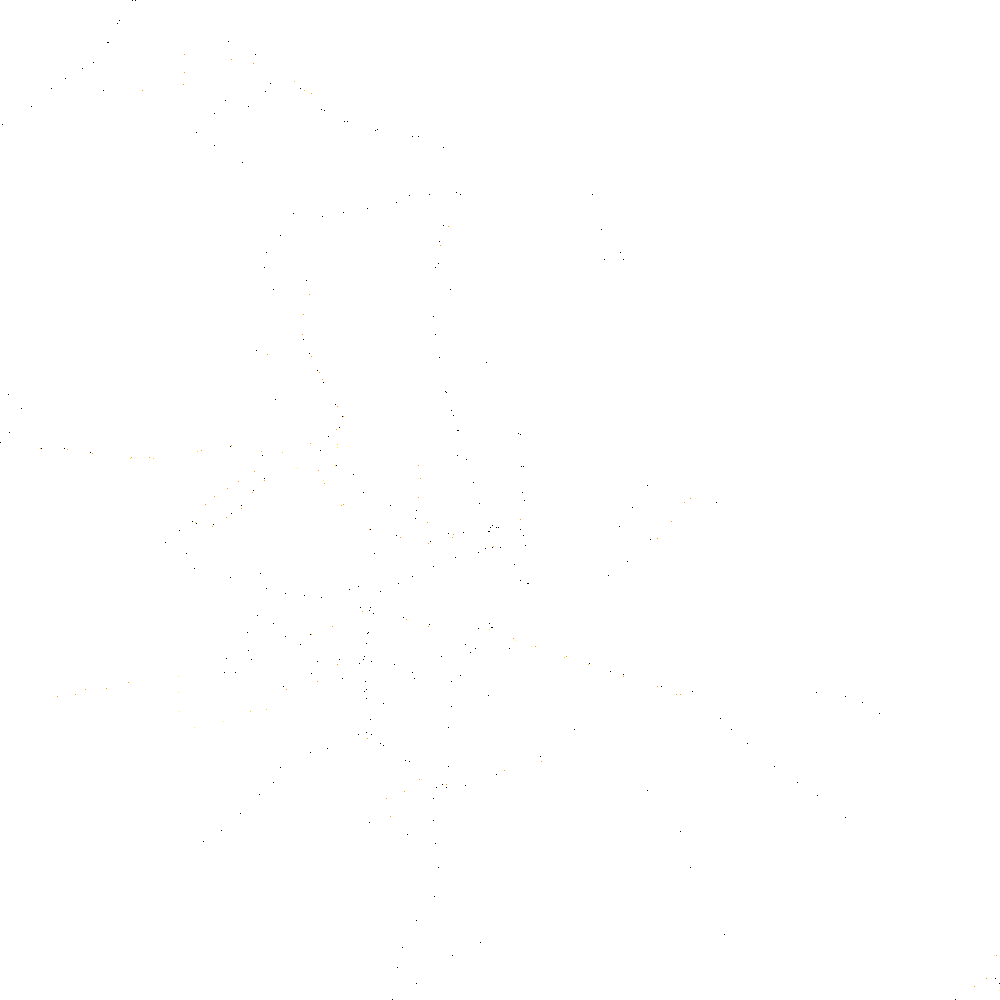

In [ ]:
#import pandas as pd
#!pip install plotly
import plotly.express as px
dff = geometry_df.query('y_coor < 47.548766').query('y_coor > 47.387982').query('x_coor > 18.954419').query('x_coor < 19.142015')
#bme_i = 47.47277215114886, 19.060034103922074
import plotly
#datashader steps
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(dff, x='x_coor', y='y_coor')
# agg is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = agg.coords['y_coor'].values, agg.coords['x_coor'].values
# Corners of the image, which need to be passed to mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]

from colorcet import fire
import plotly.graph_objects as go
import datashader.transfer_functions as tf
img = tf.shade(agg, cmap=fire)[::-1].to_pil()

import plotly.express as px
# Trick to create rapidly a figure with mapbox axes
#fig = px.density_mapbox(geometry_df, lat=geometry_df.y_coor, lon= geometry_df.x_coor,zoom=12, hover_name='stop_name', 
#                        hover_data=["x_coor", "y_coor"], radius=5, labels={'get_on':'get_on', 'time_to_school':'time_to_school'})
fig = px.density_mapbox(geometry_df, lat = geometry_df.y_coor, lon = geometry_df.x_coor, z=geometry_df.z,
                        radius=20,
                        hover_name="stop_name",
                        hover_data=["x_coor","y_coor","time_to_school","vehicle"],
                        center = dict(lat = 47.47277215114886, lon = 19.060034103922074),
                        zoom = 12,
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = 'rainbow',
                        )


#point to BME
fig.add_trace(go.Scattermapbox(
        lat=[47.47277215114886],
        lon=[19.060034103922074],
        marker=go.scattermapbox.Marker(
            size=10,
            color='rgb(0, 144, 144)',
            opacity=0.7
        ),
        text=["BME I Epulet"],
    ) )
# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-darkmatter",
                 mapbox_layers = [
                {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                }]
)
fig.show()

In [ ]:
any√°d=trips[trips["trip_id"].isin(intercept_one["trip_id"])]
kurva=shapes[shapes["shape_id"].isin(any√°d["shape_id"])]

In [ ]:
import shapely
lats = []
lons = []
names = []

for feature, name in zip(kurva.geometry, intercept_one["short_names"]):
    if isinstance(feature, shapely.geometry.linestring.LineString):
        linestrings = [feature]
    elif isinstance(feature, shapely.geometry.multilinestring.MultiLineString):
        linestrings = feature.geoms
    else:
        continue
    for linestring in linestrings:
        x, y = linestring.xy
        lats = np.append(lats, y)
        lons = np.append(lons, x)
        names = np.append(names, [name]*len(y))
        lats = np.append(lats, None)
        lons = np.append(lons, None)
        names = np.append(names, None)

fig = px.line_mapbox(lat=lats, lon=lons, hover_name=names)

fig.add_trace(go.Scattermapbox(
        lat=[47.47277215114886],
        lon=[19.060034103922074],
        marker=go.scattermapbox.Marker(
            size=10,
            color='rgb(0, 144, 144)',
            opacity=0.7
        ),
        text=["BME I Epulet"],))

fig.update_layout(mapbox_style="carto-darkmatter",
                  mapbox_zoom=13,
                  margin={"r":0,"t":0,"l":0,"b":0}
                 )

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 308 (delta 79), reused 98 (delta 55), pack-reused 171
Receiving objects: 100% (308/308), 89.88 KiB | 8.17 MiB/s, done.
Resolving deltas: 100% (141/141), done.
Traceback (most recent call last):
  File "rapidsai-csp-utils/colab/env-check.py", line 1, in <module>
    import pynvml
ModuleNotFoundError: No module named 'pynvml'


In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:10 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease [20.8 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/com

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

‚è¨ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:22
üîÅ Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

‚ú®üç∞‚ú® Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 37.0.4
Uninstalling cryptography-37.0.4:
  Successfully uninstalled cryptography-37.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 427.1/427.1 kB 22.6 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(649): pinned spec python=3.8 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(649): pinned sp